In [79]:
import tree
import importlib

def p_liscia(g: int):
    if g == 0:
        return 0.0
    else:
        return 0.25

In [115]:
importlib.reload(tree)

res = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)
res2 = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)

In [116]:
tree.print_tree(res)
print("\n\n")
tree.print_tree(res2)

                                   (1|2.58)                                    
               (0|3.07)                                   [1]                  
        [0]              (0|1.18)                                              
                    (0|2.60)  (1|2.46)                                         
                    [1]  [0]  [1]  [0]                                         



                                   (0|1.97)                                    
               (0|2.21)                                (0|1.34)                
     (1|1.77)            (1|2.61)            (0|1.39)               [1]        
(0|4.64)     [1]       [0]    (1|4.03)  (0|3.85)  (1|3.06)                     
[1]  [0]                      [0]  [1]  [1]  [0]  [1]  [0]                     


In [3]:
from reproduction import *
from matplotlib import pyplot as plt
from tree import *

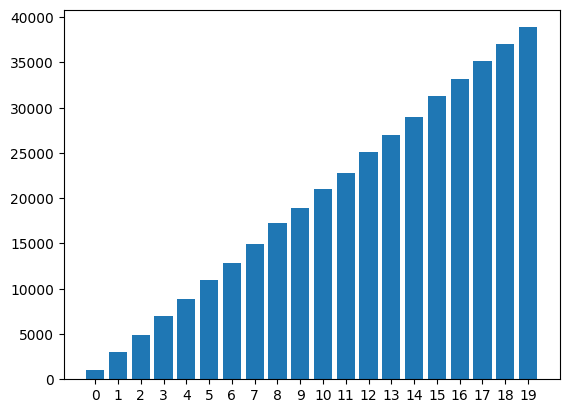

In [15]:
trees = [DecisionTree(LeafNode(0)) for _ in range(20)]
fitnesses = [float(x ** 2) for x in range(20)]
selected: list[DecisionTree] = []
for _ in range(20000):
    # selected += proportional_reproduction(trees, fitnesses)
    # selected += rank_reproduction(trees, fitnesses, 1/4, 1/4)
    # selected += truncation_reproduction(trees, fitnesses, 2/3)
    selected += tournament_reproduction(trees, fitnesses, 2)
counts = [0] * 20
for tree in selected:
    counts[trees.index(tree)] += 1
plt.bar(list(range(20)), counts)
plt.xticks(list(range(20)), list(range(20)))
plt.show()